In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 生成模拟的点
X = np.arange(0, 10, 0.1)
Y = np.array([np.random.normal(i, 1) for i in [x*5+6 for x in X]])    # np.random.normal(i, 1) 对i,随机加减（0,1）内的数
Y

array([  5.79960978,   6.96234642,   7.78687191,   6.99028865,
         6.16647901,   8.93872026,   9.27112007,   8.67668957,
        10.55563019,  10.14434104,   8.98528652,  11.26795081,
        11.83090291,  12.7298804 ,  13.26954688,  13.69958627,
        13.32241396,  14.64147118,  14.72625067,  13.91417711,
        15.41250021,  15.53998897,  17.57019739,  16.63018666,
        21.0308308 ,  18.53755263,  20.25473024,  19.31364802,
        20.1315955 ,  21.77034933,  20.1626778 ,  20.58301129,
        20.41172121,  22.97510549,  22.74543554,  22.44799322,
        23.21487559,  24.0036402 ,  25.82532684,  26.3324757 ,
        25.73416399,  25.36552012,  27.21755807,  27.34589586,
        27.04573269,  26.78438114,  27.73040874,  29.38813015,
        30.56270564,  29.9663189 ,  32.17889022,  31.16349767,
        32.25403661,  32.46921488,  32.13932559,  34.67577334,
        34.82856753,  36.16122641,  35.38514063,  34.53224028,
        37.25496958,  37.31548713,  37.57238677,  39.03

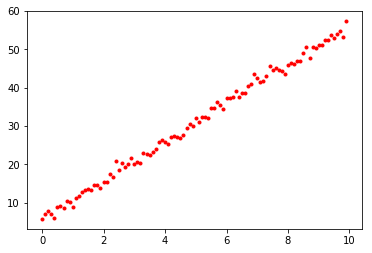

In [11]:
plt.plot(X, Y, 'r.') 
plt.show()